In [4]:
#Let's try and create the correct file paths
import os
import pandas as pd

# Define the root directory
# if this throws errors and can't find the file on the hard drive,
# restart my laptop and leave the external drive plugged in
#update: 'Aug_Nov_2016_Merged_NoGhost' is redundant
root_path = '/mnt/d/cv4e_data/interim_crops'

files = os.listdir(root_path)
# print(files)

# Initialize an empty dictionary to store the results
#image_paths = {}

df = pd.DataFrame(columns=['file_name', 'spp', 'camera', 'img_id', 'crop_idx', 'MD_detection']) #initialize an empty dataframe with columns

for idx, file_name in enumerate(files):
    if file_name.startswith('._'): #skip files that are hidden
        continue

    # create objects
    # print(f"file_name : {file_name}") # file_name : aardvark-B05-38121_crop1_animal.JPG
    spp = file_name.split('-')[0]
    camera = file_name.split('-')[1]
    temp = file_name.split('-')[2] #should be something like 38121_crop1_animal.JPG

    img_id = temp.split('_')[0] #should be 38121
    crop_idx = temp.split('_')[1] #should be crop1
    temp2 = temp.split('_')[2] #should be animal.JPG

    MD_detection = temp2.split('.')[0] #should be animal
    if MD_detection != 'animal': #skip everything that MD said was not animal - this worked
        continue

# append objects to dataframe
    df.at[idx, 'file_name'] = file_name
    df.at[idx, 'spp'] = spp #fill in species column in data frame
    df.at[idx, 'camera'] = camera
    df.at[idx, 'img_id'] = img_id
    df.at[idx, 'crop_idx'] = crop_idx
    df.at[idx, 'MD_detection'] = MD_detection

#this is used for testing
    # if idx > 10:
    #     break

# print(df)

#save df
df.to_csv('data/cropped_instances.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/cv4e_data/interim_crops'

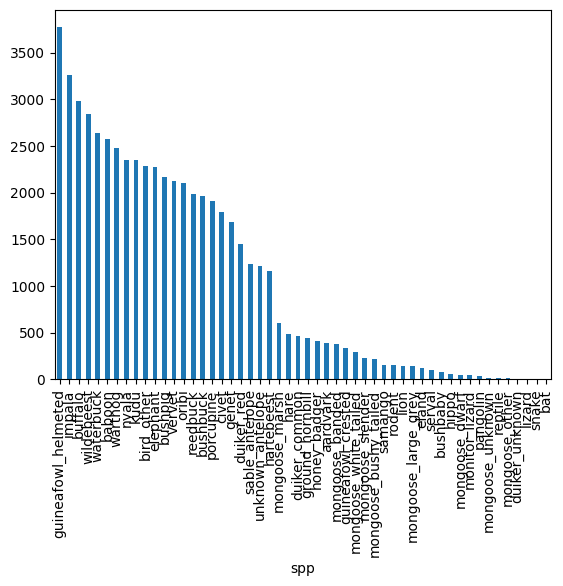

In [16]:
import matplotlib.pyplot as plt #ggplot for python

#plot a histogram of the instances of each spp classification
df["spp"].value_counts().plot(kind = "bar")

plt.show()

This is what Peter put into chatgpt

python. We have this csv ('/root/cv4e/data/cropped_instances.csv') which looks like 

file_name,spp,camera,img_id,crop_idx,MD_detection
aardvark-B05-38121_crop1_animal.JPG,aardvark,B05,38121,crop1,animal
aardvark-B05-38122_crop1_animal.JPG,aardvark,B05,38122,crop1,animal
aardvark-B05-38123_crop1_animal.JPG,aardvark,B05,38123,crop1,animal
aardvark-B05-38124_crop1_animal.JPG,aardvark,B05,38124,crop1,animal
aardvark-B05-38125_crop1_animal.JPG,aardvark,B05,38125,crop1,animal
aardvark-B05-38126_crop1_animal.JPG,aardvark,B05,38126,crop1,animal
aardvark-B05-38127_crop1_animal.JPG,aardvark,B05,38127,crop1,animal
aardvark-B05-38128_crop1_animal.JPG,aardvark,B05,38128,crop1,animal


And we want to have it converted into a nested dict like:

{'location-000': {'bear':4,'wolf':10},
 'location-001': {'bear':12,'elk':20}}



where location is the 'camera' column, and the species names are in the 'spp' col.




In [ ]:
#need to reform csv into dictionary to run megadetector function on for splitting train/test
#https://megadetector.readthedocs.io/en/latest/utils.html#megadetector.utils.split_locations_into_train_val.split_locations_into_train_val

import csv
from collections import defaultdict

# Initialize the result dictionary
result = defaultdict(lambda: defaultdict(int))

# Path to the CSV file
csv_file = '/root/cv4e/data/cropped_instances.csv'

# Read the CSV file and process each row
with open(csv_file, mode='r') as file:
    reader = csv.DictReader(file)  # Read CSV into a dictionary format
    row_count = 0  # Initialize the row counter
    for row in reader:
        # if row_count >= 10000:  # Check if we've processed 1000 rows
        #     break  # Stop processing if 1000 rows are reached
        location = row['camera']        # Extract the camera (location) value
        species = row['spp']            # Extract the species value
        result[location][species] += 1  # Increment the count for this species at the location
        row_count += 1  # Increment the row counter

# Convert the defaultdict to a regular dict for cleaner output
#this line of code does the same as below, just slightly less clear
# result = {location: dict(species_count) for location, species_count in result.items()}

location_spp_dict = {}
for location, species_count in result.items():
    # Convert species_count (which is a defaultdict) to a regular dict
    location_spp_dict[location] = dict(species_count)

# Optionally, print the result to check the output
import json
print(json.dumps(location_spp_dict, indent=2))


In [1]:
#import megadetector module from one directory up
import sys

# Add the parent directory to the sys.path
# sys.path.append('/root') #we know the parent directory is /root
sys.path.append('/root/MegaDetector') #we know the parent directory is /root
#MegaDetector is the repo

# Now you can import the module as usual
#megadetector is a Python module, within that module is a sub-module/directory called "utils", and 
#we think "split_locations_into_train_val" is a Python script
#with a function of the same name that we're going to use
from megadetector.utils.split_locations_into_train_val import split_locations_into_train_val





In [2]:
#in Python: main/positional argument - requires input
#key word/optional arguments - have a default value, you don't *have* to put something in

import random

random.seed(77) #set a seed so it always gives the same

split = split_locations_into_train_val(location_to_category_counts = location_spp_dict)

NameError: name 'location_spp_dict' is not defined